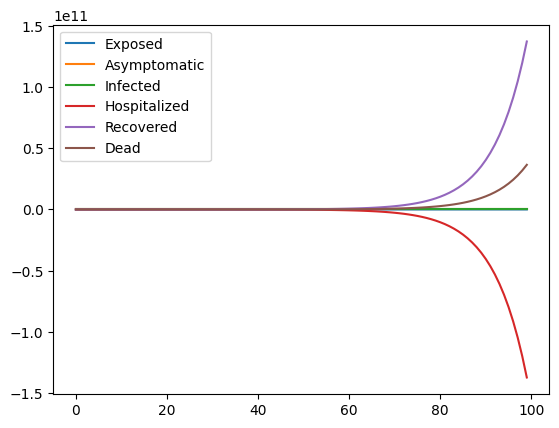

In [21]:
'''Bug fixing for the SEIARDH model, not longer relevant'''


import pandas as pd 
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def RHS(t,state):

    #params has all the parameters – beta, gamma

    #state is a numpy array

 

        S,E,A,I,R,H,D = state #unpack the state variables

        N = S + E + A + I + R + H +D  #compute the total population

        kL=0.25
            
        fA=0.44

        fH=0.054

        fR=0.79

        cA=0.26

        cI=0.12

        cH=0.17

        beta = 0.1

 
        '''The state transitions of the ODE model is below'''

        dS = -beta*(S*I)/N

        dE = beta*S*I/N-kL*E

        dA = kL*fA*E-cA*A

        dI = kL*(1-fA)*E-cI*I # compare the I compartment to the reported case number, this model works for case number comparison, may not work for hospitalization number

        dH = cI*fH*I-cH*fR * H

        dR = cA*A+cI*(1-fH)*I+cH*fR*H

        dD = cH*(1-fR)*H


        return np.array([dS,dE,dA,dI,dH,dR,dD])
    


t_span = (0.0, 100.0)
y0 = [6_500_000,500000,0,0,0,0,0]
result_solve_ivp = solve_ivp(RHS, t_span, y0, args=(),t_eval = np.linspace(0,100,100))

labels = ['Susceptible','Exposed','Asymptomatic','Infected','Hospitalized','Recovered','Dead']

for i in range(6): 
    plt.plot(np.arange(0,100),result_solve_ivp.y[i+1,:],label = labels[i])

plt.legend()


